In [ ]:
import utils
import numpy as np
from DAE_funcs import add_brownian_white_noise
import matplotlib.pyplot as plt

In [161]:
# Load data
data, Index, Class = utils.load_training_data()
data_6 = utils.load_file_data('TESTING DATA/D6.mat')
shape = data.shape

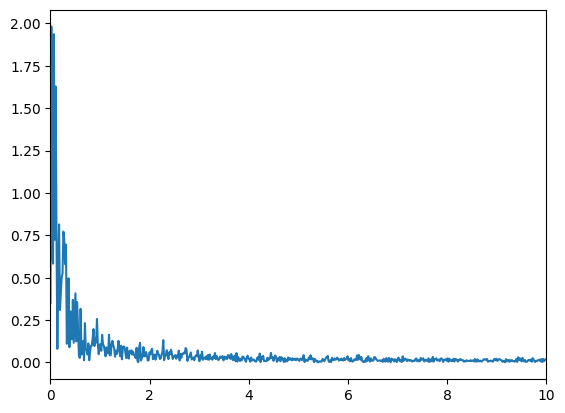

In [262]:
import scipy.fftpack

# Number of samplepoints
N = len(data_6)
# sample spacing
T = 1 / 25000
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(data_6)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_xlim(0, 10)
plt.show()

In [263]:
# # Generate noise
# noise = np.random.normal(0, 3, shape)

In [563]:
# Add noise to data
# noisy_data = add_brownian_noise(data, 0.025)
# noisy_data = add_white_noise(noisy_data, 2.5)

noisy_data = add_brownian_white_noise(data, 4, 0.02)

# p_noise = np.random.poisson(20, shape)
# noisy_data = data + p_noise

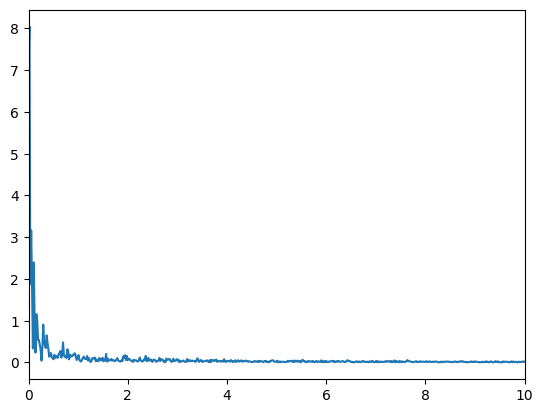

In [ ]:
# Number of samplepoints
N = len(noisy_data)
# sample spacing
T = 1 / 25000

yf = scipy.fftpack.fft(noisy_data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_xlim(0, 10)
ax.set_ylim(-0.1, 2.1)
plt.show()

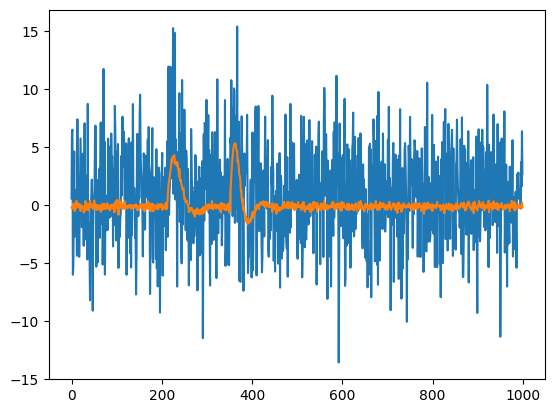

In [571]:

plt.plot(noisy_data[2000:3000])
plt.plot(data[2000:3000])

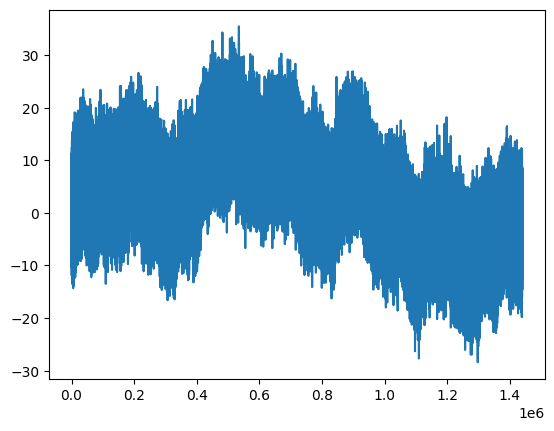

In [572]:
plt.plot(noisy_data)

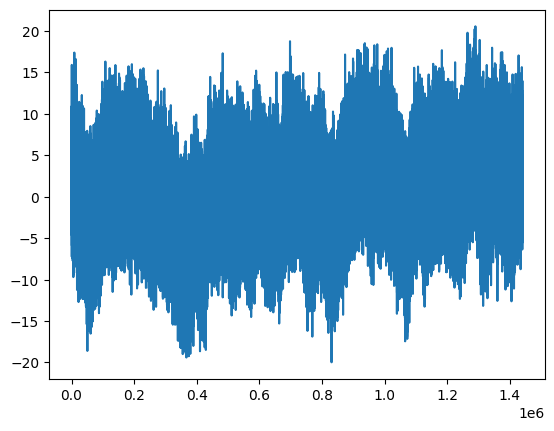

In [573]:
plt.plot(data_6)

In [574]:
from skimage.restoration import denoise_wavelet

# # Use wavelets to denoise the data
# denoised_data = denoise_wavelet(
#         noisy_data, 
#         method='BayesShrink', 
#         mode='soft', 
#         wavelet_levels=5,
#         wavelet='bior6.8',
#         rescale_sigma='True'
#         )

# High-pass filter the data
numtaps = 1501
fc = 50
fs = 25000
filter_coef = utils.create_hp_filter(numtaps, fc, fs)
filtered_data = utils.filter_data(noisy_data, filter_coef, numtaps)

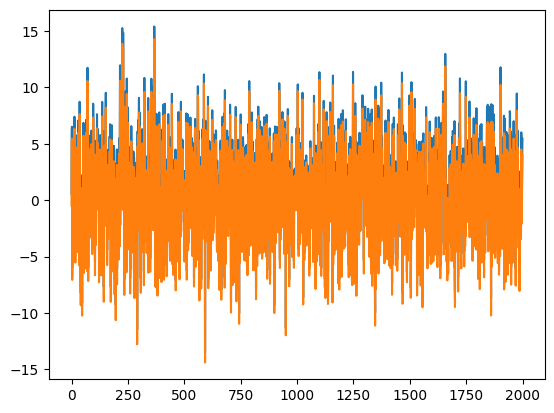

In [575]:
import matplotlib.pyplot as plt
plt.plot(noisy_data[2000:4000])
plt.plot(filtered_data[2000:4000])